In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from gensim.models import KeyedVectors
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

import sys
from pathlib import Path

# Add the project root directory to Python path
project_root = str(Path().absolute().parent)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.utils import load_models

import matplotlib.pyplot as plt
# 设置更好的可视化风格

# 设置更好的可视化风格
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
# 假设notebooks目录在项目根目录下


from src.utils import download_chinese_font
import src.utils as utils
# 下载并安装字体
font_path = download_chinese_font()

# 设置matplotlib使用下载的字体
if font_path:
    plt.rcParams['font.sans-serif'] = ['SimHei'] + plt.rcParams['font.sans-serif']
    print("成功设置中文字体")
else:
    print("无法设置中文字体，将使用替代方案")

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 定义项目根目录和模型目录
PROJECT_ROOT = Path.cwd().parent
MODELS_DIR = PROJECT_ROOT / "models"

# 可能的模型目录
FINE_TUNED_MODELS_DIR = MODELS_DIR / "fine_tuned_vectors_flexible"
SLIDING_WINDOW_MODELS_DIR = MODELS_DIR / "fine_tuned_vectors_sliding_window"

models = load_models(MODELS_DIR)

字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体
使用固定时期模型目录: /home/fangshikai/law-word-vector/models/fine_tuned_vectors_flexible
找到 3 个模型文件:
  加载模型: Era1_1978-1996
  成功加载 Era1_1978-1996, 词汇量: 4874
  加载模型: Era2_1997-2013
  成功加载 Era2_1997-2013, 词汇量: 4992
  加载模型: Era3_2014-2024
  成功加载 Era3_2014-2024, 词汇量: 5000


In [2]:
# 创建输出目录
topic_word_dir = Path("topic_word")
topic_word_dir.mkdir(exist_ok=True)


# 2. 加载相似词数据
era_files = {
    'Era1_1978-1996': 'similar_words/Era1_1978-1996_final.txt',
    'Era2_1997-2013': 'similar_words/Era2_1997-2013_final.txt',
    'Era3_2014-2024': 'similar_words/Era3_2014-2024_final.txt'
}

similar_words_by_period = {}
for era, file_path in era_files.items():
    word_list = utils.load_expert_word_list(file_path)
    if word_list:
        similar_words_by_period[era] = word_list
        print(f"加载 {era}: {len(word_list)} 个词")

加载 Era1_1978-1996: 150 个词
加载 Era2_1997-2013: 150 个词
加载 Era3_2014-2024: 150 个词


In [3]:
from dimension_analysis import load_dimension_words, calculate_dimension_similarities, plot_dimension_trends, plot_dimension_radar, plot_dimension_heatmap
from dimension_analysis import expand_dimension_words_by_similarity, save_expanded_dimension_words

字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体



已加载4维度词表:
  制度建构: 21 个词
  程序正义: 18 个词
  权利保障: 20 个词
  治理效能: 20 个词

4维度相似度矩阵:
               时期      制度建构      程序正义      权利保障      治理效能
0  Era1_1978-1996  0.309728  0.264290  0.207684  0.365729
1  Era2_1997-2013  0.357989  0.382325  0.310768  0.501166
2  Era3_2014-2024  0.360454  0.280954  0.285411  0.449224


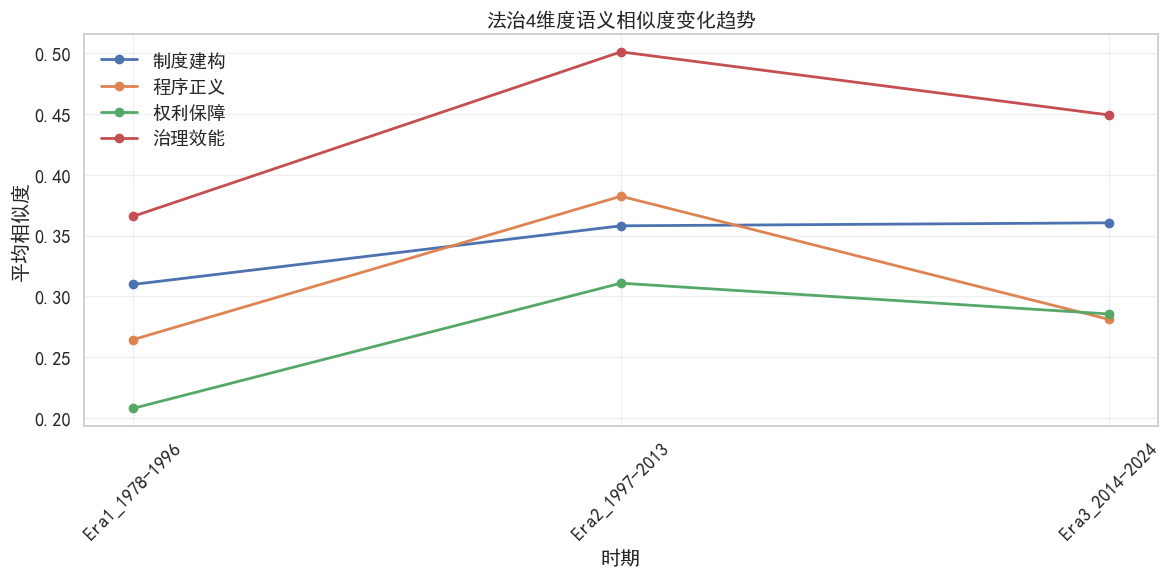

<Figure size 640x480 with 0 Axes>

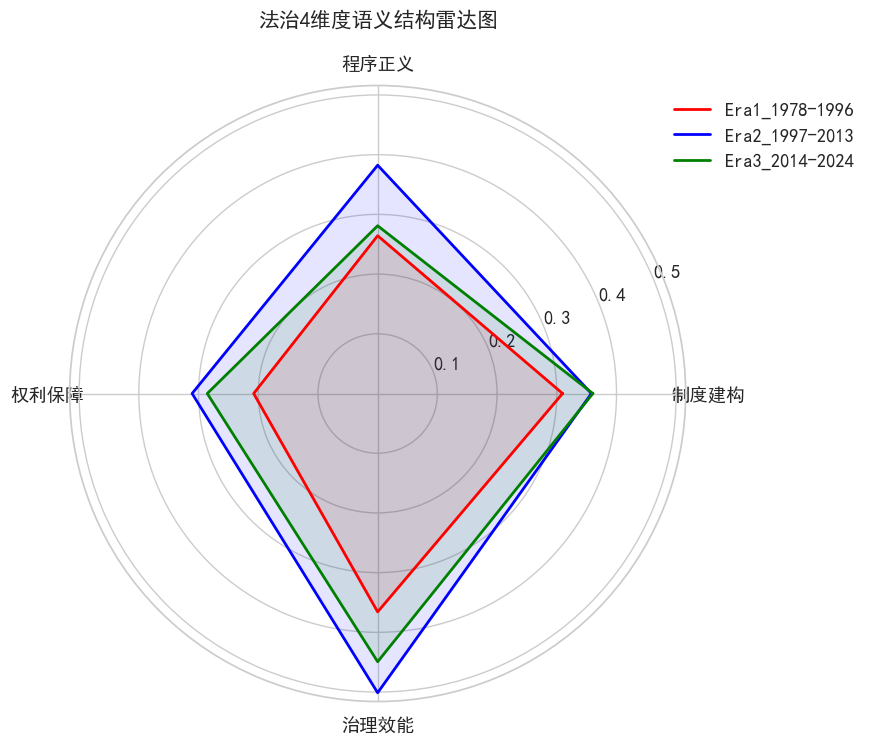

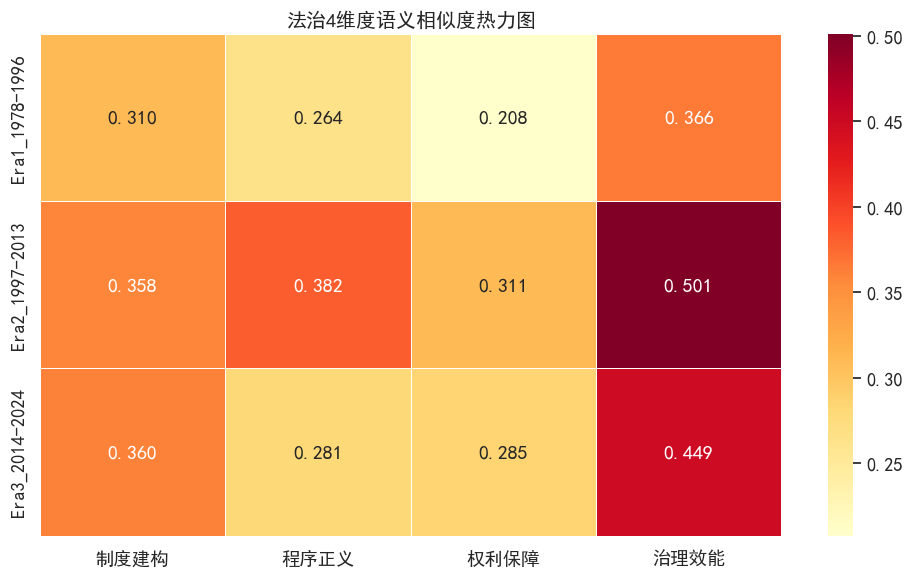

<Figure size 640x480 with 0 Axes>

In [4]:

dimension_words_4d = load_dimension_words(topic_word_dir / "dimension_words_4d.txt")
if dimension_words_4d:
    print("\n已加载4维度词表:")
    for dim, words in dimension_words_4d.items():
        print(f"  {dim}: {len(words)} 个词")
    
    # 计算相似度
    similarity_df_4d = calculate_dimension_similarities(
        models, 
        dimension_words_4d,
        target_word="法治",
        # normalize=True
        )
    print("\n4维度相似度矩阵:")
    print(similarity_df_4d)
    
    # 绘制可视化
    if not similarity_df_4d.empty:
        plot_dimension_trends(similarity_df_4d, "法治4维度语义相似度变化趋势")
        plot_dimension_radar(similarity_df_4d, "法治4维度语义结构雷达图")
        plot_dimension_heatmap(similarity_df_4d, "法治4维度语义相似度热力图")



=== 基于平均相似度扩展4维度词表 ===
使用所有 3 个模型的平均相似度进行词表扩展
候选词数量: 1146

扩展后的词表统计:
制度建构: 80 个词 (原有 21 + 新增 59)
程序正义: 80 个词 (原有 18 + 新增 62)
权利保障: 71 个词 (原有 20 + 新增 51)
治理效能: 80 个词 (原有 20 + 新增 60)
已保存扩展词表到: expanded_dimension_words_4d.txt

4维度相似度矩阵:
               时期      制度建构      程序正义      权利保障      治理效能
0  Era1_1978-1996  0.269932  0.230332  0.180999  0.318738
1  Era2_1997-2013  0.230626  0.246304  0.200205  0.322865
2  Era3_2014-2024  0.261950  0.204175  0.207414  0.326461

=== 扩展后词表相似度分析 ===

扩展后4维度相似度矩阵:
               时期      制度建构      程序正义      权利保障      治理效能
0  Era1_1978-1996  0.266990  0.254421  0.214441  0.264147
1  Era2_1997-2013  0.235633  0.247041  0.234592  0.282735
2  Era3_2014-2024  0.259054  0.232441  0.223891  0.284615


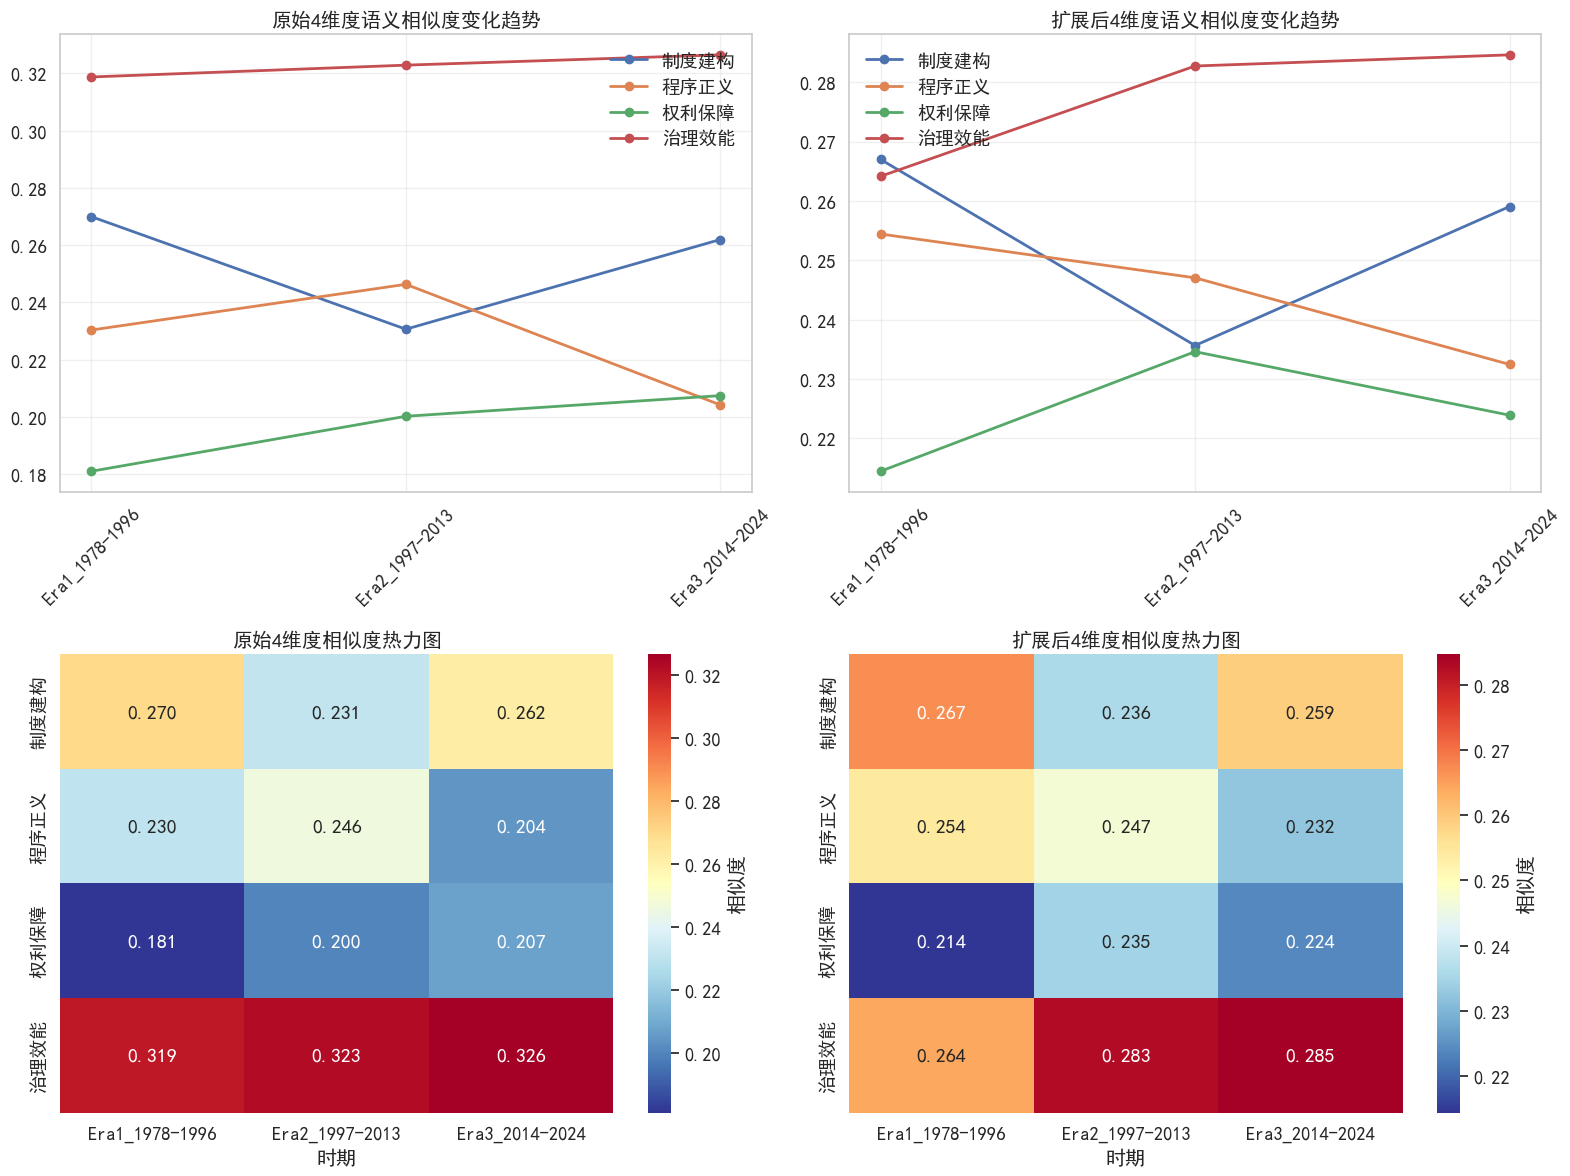


=== 各维度新增词汇示例 ===

制度建构 新增词汇 (59个):
  示例: 司法局, 惩治, 颁布实施, 行为规范, 建章立制, 个案, 纳入, 法制轨道, 司法部, 体系, 法学院, 有章可循, 精神实质, 范畴, 全国人大常委会法工委, 法制, 方法, 加强, 司法解释, 规范性

程序正义 新增词汇 (62个):
  示例: 法理, 法律界, 法无, 限权, 因此, 监督制度, 依据, 知法犯法, 法理学, 民主性, 锐评, 劣地, 执法不严, 功过, 管理机构, 七五, 司法制度, 既然, 草原法, 分开

权利保障 新增词汇 (51个):
  示例: 公民, 公共秩序, 本位, 以人为本, 民事权利, 价值观念, 正义, 社会性, 审判权, 其本质, 主体, 国际法, 公正, 保障, 国家主权, 事实证明, 前提, 保障人权, 西南政法大学, 权益

治理效能 新增词汇 (60个):
  示例: 长治久安, 严格管理, 渐进, 资源配置, 现代文明, 执政为民, 建设, 法律意识, 平平安安, 必要条件, 行稳, 这要, 守法, 相辅相成, 公信力, 方略, 信法, 治校, 严格执法, 反腐倡廉


In [6]:

# 运行词表扩展
print("\n=== 基于平均相似度扩展4维度词表 ===")
expanded_dimension_words_4d = expand_dimension_words_by_similarity(
    models, dimension_words_4d, target_word="法治", 
    similarity_threshold=0.25, max_words_per_dim=80
)

normalize = True

# 保存扩展后的词表
save_expanded_dimension_words(expanded_dimension_words_4d, "expanded_dimension_words_4d.txt")

similarity_df_4d = calculate_dimension_similarities(
    models, dimension_words_4d,target_word="法治",normalize=normalize)
print("\n4维度相似度矩阵:")
print(similarity_df_4d)

# 计算扩展后词表的相似度并可视化
print("\n=== 扩展后词表相似度分析 ===")
expanded_similarity_df_4d = calculate_dimension_similarities(
    models, expanded_dimension_words_4d, target_word="法治", normalize=normalize
)

print("\n扩展后4维度相似度矩阵:")
print(expanded_similarity_df_4d)

# 对比原始和扩展后的相似度
if not expanded_similarity_df_4d.empty:
    # 绘制对比图
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 原始词表趋势图
    axes[0, 0].set_title("原始4维度语义相似度变化趋势")
    for dim in similarity_df_4d.columns[1:]:
        axes[0, 0].plot(similarity_df_4d['时期'], similarity_df_4d[dim], 
                       marker='o', linewidth=2, label=dim)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 扩展后词表趋势图
    axes[0, 1].set_title("扩展后4维度语义相似度变化趋势")
    for dim in expanded_similarity_df_4d.columns[1:]:
        axes[0, 1].plot(expanded_similarity_df_4d['时期'], expanded_similarity_df_4d[dim], 
                       marker='o', linewidth=2, label=dim)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 原始词表热力图
    original_heatmap_data = similarity_df_4d.set_index('时期').T
    sns.heatmap(original_heatmap_data, annot=True, fmt='.3f', cmap='RdYlBu_r', 
                ax=axes[1, 0], cbar_kws={'label': '相似度'})
    axes[1, 0].set_title("原始4维度相似度热力图")
    
    # 扩展后词表热力图
    expanded_heatmap_data = expanded_similarity_df_4d.set_index('时期').T
    sns.heatmap(expanded_heatmap_data, annot=True, fmt='.3f', cmap='RdYlBu_r', 
                ax=axes[1, 1], cbar_kws={'label': '相似度'})
    axes[1, 1].set_title("扩展后4维度相似度热力图")
    
    plt.tight_layout()
    plt.show()
    
    # 显示新增词汇示例
    print("\n=== 各维度新增词汇示例 ===")
    for dim in dimension_words_4d.keys():
        original_words = set(dimension_words_4d[dim])
        expanded_words = set(expanded_dimension_words_4d[dim])
        new_words = expanded_words - original_words
        
        print(f"\n{dim} 新增词汇 ({len(new_words)}个):")
        if new_words:
            # 显示前20个新增词汇
            sample_words = list(new_words)[:20]
            print(f"  示例: {', '.join(sample_words)}")
        else:
            print("  无新增词汇")

